In [0]:
import pandas as pd

df = pd.read_csv("OfficialDataSet.csv")

In [37]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Nums/Length Fullname,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Last Post Recent,Fake
0,1,0.000,2,0.0,42,1,0,0,0,102,678,405,1,0
1,1,0.067,2,0.0,0,0,0,0,0,58,334,434,1,0
2,1,0.000,0,0.0,0,0,0,0,0,44,539,364,1,0
3,1,0.000,2,0.0,14,0,0,0,0,188,3098,286,1,0
4,1,0.000,2,0.0,0,0,0,0,1,496,1079,1979,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0.000,2,0.0,2,0,1,0,0,8,661,1562,Null,1
1196,0,0.000,0,0.0,0,0,0,0,0,0,2,223,Null,1
1197,1,0.000,2,0.0,58,0,1,0,0,47,296,4909,Null,1
1198,1,0.143,1,0.0,0,0,1,0,0,0,5,67,Null,1


In [38]:
X=df.iloc[:, 0:12].values
X

array([[1.000e+00, 0.000e+00, 2.000e+00, ..., 1.020e+02, 6.780e+02,
        4.050e+02],
       [1.000e+00, 6.700e-02, 2.000e+00, ..., 5.800e+01, 3.340e+02,
        4.340e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 4.400e+01, 5.390e+02,
        3.640e+02],
       ...,
       [1.000e+00, 0.000e+00, 2.000e+00, ..., 4.700e+01, 2.960e+02,
        4.909e+03],
       [1.000e+00, 1.430e-01, 1.000e+00, ..., 0.000e+00, 5.000e+00,
        6.700e+01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 3.000e+00, 8.100e+01,
        6.108e+03]])

In [39]:
y=df.iloc[:,13].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [41]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 11 (0.237112)
2. feature 4 (0.128954)
3. feature 8 (0.122043)
4. feature 5 (0.121324)
5. feature 10 (0.101343)
6. feature 9 (0.066150)
7. feature 1 (0.061781)
8. feature 7 (0.052841)
9. feature 2 (0.041485)
10. feature 0 (0.034613)
11. feature 6 (0.027614)
12. feature 3 (0.004739)


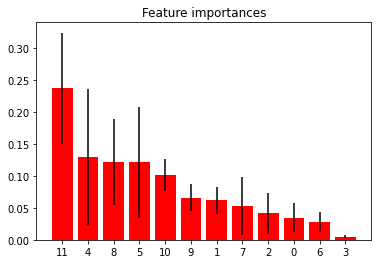

In [42]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()